(Part of coursework for introduction to mathematical computing in which a prompt was given and we were expected to write our own code)

Create, from scratch, your own version of the Graham scan algorithm for computing the convex hull. Your code should be in the form of a function `get_hull(points)` which takes as argument a $2\times N$ array of point coordinate pairs $(x,y)$ and returns the subset of those points which would make up the vertices of the convex hull.
    
The function should be tested by the following
    
```python
points = np.random.rand(2,N)
hull = get_hull(points)

plt.plot(points[0,:],points[1,:],'.')
plt.plot(np.append(hull[0,:],hull[0,0]),np.append(hull[1,:],hull[1,0])) 
    # append is used to close the hull
plt.show()    
```
    
and will be tested against several different arrays of points for grading. Marks out of 10 including 3 marks for good programming practise (e.g. use of comments, functions, readability etc).
    
Note, as described in the video, your hull must begin with the point with lowest $y$ coordinate. Your function should take a $2\times N$ `numpy` array as input and return a $2\times M$ `numpy` array, where $M$ is the size of the hull.
    
Credit will be awarded via the following tests:
    
* The returned variable (`hull` above) is of the correct `type` (same as `points` above).
* The returned array has the correct size and shape.
* The trivial hull of 3 points is returned.
* The correct subset of points is recovered for any N.

In [1]:
import numpy as np

import math

import matplotlib.pyplot as plt

# creating a function to return the index order with respect to inverse gradients in ascending order

def inv_grad(points):
    
    # returning the index of the lowest y coordinate and thus setting the origin index
    
    origin = int(np.argmin(points[1, :]))
    
    # calculating the inverse gradient of the points  
    
    inv_grad = np.zeros(len(points[0, :]), dtype = float)
    
    for i in range(0, len(points[0, :])):
        if (i != origin):
            inv_grad[i] = (points[0, origin] - points[0, i])/(points[1, origin] - points[1, i])
        if (i == origin):
            inv_grad[i] = -math.inf
            
    # sorting these from smallest to largest     
    
    index_order = np.argsort(inv_grad)
    
    return(index_order)

# creating a function to return the cross product of 3 points
    
def cross_product(x1, x2, x3):
    cross_product = (x2[0]- x1[0])*(x3[1] - x1[1]) - (x2[1] - x1[1])*(x3[0] - x1[0])
    
    return(cross_product)
                        
def get_hull(points):
    
    # reordering the points and creating an array with the ordered points
    
    order = inv_grad(points)
    
    ordered_points = points.copy()
    
    for i in range(0, len(points[0, :])):
        ordered_points[0][i] = points[0][order[i]]
        ordered_points[1][i] = points[1][order[i]]
        
    # creating array for the hull, with the first two points
    
    hull = np.array(ordered_points[:, 0:2])
    
    # creating a loop to add all the ordered points starting from the third point
    
    for i in range(2, len(ordered_points[0, :])):
        
        hull = np.insert(hull, len(hull[0, :]), 0, axis = 1)
        
        hull[0][-1] = ordered_points[0][i]
        hull[1][-1] = ordered_points[1][i]
        
        # setting the coordinates using the last three points of hull
        
        x1 = [hull[0][-1], hull[1][-1]]
        x2 = [hull[0][-2], hull[1][-2]]
        x3 = [hull[0][-3], hull[1][-3]]
        
        # creating a loop to remove penultimate point if cross product is zero
        
        while cross_product(x1, x2, x3) < 0 and len(hull[0])>3: 
            
            hull = np.delete(hull, [-2], axis = 1)
            
            x1 = [hull[0][-1], hull[1][-1]]
            x2 = [hull[0][-2], hull[1][-2]]
            x3 = [hull[0][-3], hull[1][-3]]        
         
    return(hull)


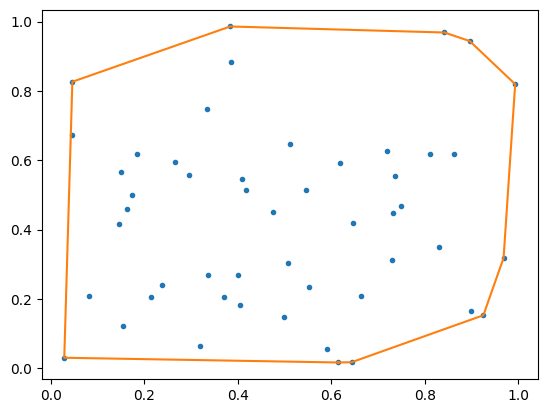

In [2]:
import matplotlib.pyplot as plt
N = 50
points = np.random.rand(2,N)
hull = get_hull(points)

plt.plot(points[0,:],points[1,:],'.')
plt.plot(np.append(hull[0,:],hull[0,0]),np.append(hull[1,:],hull[1,0])) 
    # append is used to close the hull
plt.show()    
